## Network Intrusion

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.metrics import classification_report,confusion_matrix

In [2]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
df_train=pd.read_excel("Train.xlsx",names=datacols)

In [4]:
df_train = df_train.iloc[:,:-1] 
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


In [5]:
# Load NSL_KDD test dataset
df_test = pd.read_excel("Test.xlsx",names=datacols)
df_test = df_test.iloc[:,:-1]
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan
4,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal


In [6]:
df_train.protocol_type.value_counts()

tcp     102688
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [7]:
df_train.root_shell.value_counts()

0    125803
1       169
Name: root_shell, dtype: int64

In [8]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [9]:
# Apply attack class mappings to the dataset
df_train['attack_class'] = df_train['attack'].apply(lambda v: mapping[v])
df_test['attack_class'] = df_test['attack'].apply(lambda v: mapping[v])

In [10]:
# # Drop attack field from both train and test data
df_train.drop(['attack'], axis=1, inplace=True)
df_test.drop(['attack'], axis=1, inplace=True)

In [11]:
df_train.isnull().sum().sum()

0

In [12]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [13]:
df_train.drop(["num_outbound_cmds"],axis=1,inplace=True)
df_test.drop(["num_outbound_cmds"],axis=1,inplace=True)


### Binomial Classification

In [14]:
df_train_binomial  = df_train.copy()
df_test_binomial = df_test.copy()

In [15]:
def binomial(x):
    if x in ['DoS','Probe','R2L','U2R']:
        activity='attack'
    else:
        activity='normal'
    return activity

In [16]:
df_train_binomial['attack_class']=df_train_binomial['attack_class'].apply(binomial)
df_test_binomial['attack_class']=df_test_binomial['attack_class'].apply(binomial)

In [17]:
df_train_binomial['attack_class'].value_counts()

normal    67342
attack    58630
Name: attack_class, dtype: int64

In [18]:
df_train_binomial.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal


In [19]:
attack_class_freq_train = df_train_binomial[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = (100 * attack_class_freq_train / attack_class_freq_train.sum())
attack_class_freq_train

,attack_class,frequency_percent_train
normal,67342,53.457911
attack,58630,46.542089


In [20]:
attack_class_freq_test = df_test_binomial[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test['frequency_percent_test'] = (100 * attack_class_freq_test / attack_class_freq_test.sum())
attack_class_freq_test

,attack_class,frequency_percent_test
attack,12832,56.922326
normal,9711,43.077674


### Here i will do label encoding rather than one hot encoding

In [21]:
lst =[]
lst2 = []
for i in df_train_binomial.columns.values:
    if df_train_binomial[i].dtype in ['int64','float64']:
        lst.append(i)
    else :
        lst2.append(i)

In [22]:
df_train_bin_num = df_train_binomial[lst]
df_train_bin_cat = df_train_binomial[lst2]

In [23]:
df_test_bin_num = df_test_binomial[lst]
df_test_bin_cat = df_test_binomial[lst2]

In [24]:
df_train_bin_num.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00
1,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00
2,0,232,8153,0,0,0,0,0,1,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01
3,0,199,420,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
4,0,0,0,0,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00


In [25]:
# encode the categorical attributes
encoder = LabelEncoder()
traincat = df_train_bin_cat.apply(encoder.fit_transform)
testcat = df_test_bin_cat.apply(encoder.fit_transform)

In [26]:
traincat.head()

,protocol_type,service,flag,attack_class
0,2,44,9,1
1,1,49,5,0
2,1,24,9,1
3,1,24,9,1
4,1,49,1,0


### Scaling

In [27]:
cols = df_train_bin_num.select_dtypes(include=['float64','int64']).columns

In [28]:
len(cols)

37

In [29]:
scaler = StandardScaler()
scaled_train = scaler.fit_transform(df_train_bin_num)
scaled_test = scaler.fit_transform(df_test_bin_num)

In [30]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(scaled_train, columns = cols)
sc_testdf = pd.DataFrame(scaled_test, columns = cols)

### Combining categorical and numerical variable

In [31]:
df_binomial_train = pd.concat([sc_traindf,traincat],axis =1)

In [32]:
df_binomial_test = pd.concat([sc_testdf,testcat],axis =1)

In [33]:
df_binomial_train_x = df_binomial_train.drop('attack_class',axis=1)
df_binomial_train_y = df_binomial_train['attack_class']

In [34]:
df_binomial_test_x = df_binomial_test.drop('attack_class',axis=1)
df_binomial_test_y = df_binomial_test['attack_class']

###  Model 1 : SVM
#### (all the parameters are used here after hit and trial method and found it best as my machine don't have such computational power. Please consider this)

In [35]:
from sklearn.svm import SVC

In [36]:
model = SVC(C=8,gamma =0.009,random_state=12)

In [37]:
model.fit(df_binomial_train_x,df_binomial_train_y)

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.009, kernel='rbf',
    max_iter=-1, probability=False, random_state=12, shrinking=True, tol=0.001,
    verbose=False)

### Prediction and Evaluation

In [38]:
predictions = model.predict(df_binomial_test_x)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(df_binomial_test_y,predictions))

[[9081 3751]
 [ 243 9468]]


In [41]:
from sklearn import metrics
print(metrics.accuracy_score(df_binomial_train_y, model.predict(df_binomial_train_x)))
print(metrics.accuracy_score(df_binomial_test_y, predictions))

0.9951735306258533
0.8228274852504103


### Parameter tuning

In [42]:
#from sklearn.model_selection import GridSearchCV

In [89]:
#param_grid = {'C': np.arange(5,10,1), 'gamma': np.arange(0.0001,0.01,0.0001), 'kernel': ['rbf','poly']} 

In [90]:
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,scoring = 'roc_auc',n_jobs = -1,cv =2)

In [ ]:
# print('Best score: ', grid.best_score_)
# print('Best parameters: ', grid.best_params_)

### Model 2 : Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import BernoulliNB 

In [46]:
bnb_Classifier = BernoulliNB()
bnb_Classifier.fit(df_binomial_train_x, df_binomial_train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [47]:
pred_nb = bnb_Classifier.predict(df_binomial_test_x)

In [48]:
print(confusion_matrix(df_binomial_test_y,pred_nb))

[[7917 4915]
 [ 300 9411]]


In [49]:
print(classification_report(df_binomial_test_y,pred_nb))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75     12832
           1       0.66      0.97      0.78      9711

    accuracy                           0.77     22543
   macro avg       0.81      0.79      0.77     22543
weighted avg       0.83      0.77      0.77     22543



In [50]:
print(metrics.accuracy_score(df_binomial_train_y, bnb_Classifier.predict(df_binomial_train_x)))
print(metrics.accuracy_score(df_binomial_test_y, bnb_Classifier.predict(df_binomial_test_x)))

0.9086463658590798
0.7686643303908087


### Multiclass Classification

In [51]:
attack_class_train = df_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_test = df_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_train

,attack_class
Normal,67342
DoS,45927
Probe,11656
R2L,995
U2R,52


In [52]:
attack_class_train['frequency_percent_train'] = (100 * attack_class_train / attack_class_train.sum())
attack_class_test['frequency_percent_test'] = (100 * attack_class_test / attack_class_test.sum())

attack_class_dist = pd.concat([attack_class_train,attack_class_test], axis=1,sort = False) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67342,53.457911,9711,43.077674
DoS,45927,36.458102,7457,33.079005
Probe,11656,9.252850,2421,10.739476
R2L,995,0.789858,2754,12.216653
U2R,52,0.041279,200,0.887193


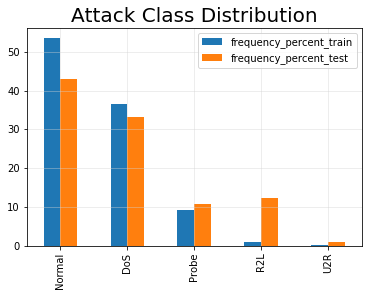

In [53]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

From the above graph it is clear that data is imbalance so to overcome this problem,
i need to apply oversampling for this to balance the data

### Seprating numerical and categorical variable & encoding categorical variable

In [54]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)


### Scaling Numerical variable

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [56]:
# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

y_mult_train = traincat[['attack_class']].copy()
y_mult_test = testcat[['attack_class']].copy()

### Data Sampling

In [57]:
from imblearn.over_sampling import RandomOverSampler

In [58]:
train_mult_x = pd.concat([sc_traindf,enctrain],axis =1)
test_mult_x = pd.concat([sc_testdf,enctest],axis =1)

In [59]:
train_mult_x
test_mult_x
y_mult_train
y_mult_test.head()

,attack_class
0,0
1,1
2,2
3,2
4,1


In [60]:
os =  RandomOverSampler()

In [61]:
X_train_res, y_train_res = os.fit_sample(train_mult_x, y_mult_train)

In [62]:
y_mult_train['attack_class'].value_counts()

1    67342
0    45927
2    11656
3      995
4       52
Name: attack_class, dtype: int64

In [63]:
y_train_res['attack_class'].value_counts()

4    67342
3    67342
2    67342
1    67342
0    67342
Name: attack_class, dtype: int64

From the Resampling the data has been evenly distributed 

In [65]:
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns

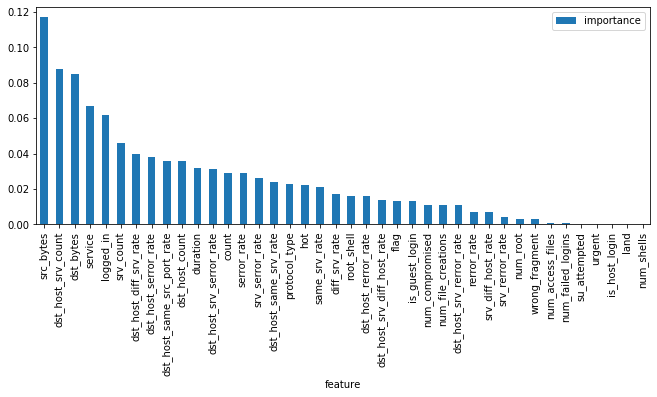

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(X_train_res, y_train_res)

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [67]:
train_x_features = X_train_res[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']]

In [68]:
test_x_features = test_mult_x[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']]

### Model : 1 Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rfc = RandomForestClassifier(n_estimators = 300,n_jobs=-1,min_samples_split =2000,
                             criterion='entropy',max_depth=10,random_state=365)

In [71]:
rfc.fit(train_x_features,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2000,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=365, verbose=0,
                       warm_start=False)

In [72]:
predictions = rfc.predict(test_x_features)

In [73]:
print(confusion_matrix(y_mult_test,predictions))

[[5730  867  860    0    0]
 [ 420 7957 1333    0    1]
 [ 760  124 1537    0    0]
 [ 323 1850  580    1    0]
 [ 102   38   56    4    0]]


In [74]:
print(classification_report(y_mult_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77      7457
           1       0.73      0.82      0.77      9711
           2       0.35      0.63      0.45      2421
           3       0.20      0.00      0.00      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.68     22543
   macro avg       0.41      0.44      0.40     22543
weighted avg       0.64      0.68      0.64     22543



In [75]:
from sklearn import metrics
print(metrics.accuracy_score(y_train_res, rfc.predict(train_x_features)))
print(metrics.accuracy_score(y_mult_test,predictions))


0.990736835852811
0.6753759481879076


### Model 2 : Naive Bayes Classifier

In [77]:
bnb_mult = BernoulliNB(alpha=3)
bnb_mult.fit(train_x_features, y_train_res)


BernoulliNB(alpha=3, binarize=0.0, class_prior=None, fit_prior=True)

In [78]:
predictions_nb = bnb_mult.predict(test_x_features)

In [79]:
print(confusion_matrix(y_mult_test,predictions_nb))

[[5143 1146 1035  133    0]
 [  40 7706 1300  471  194]
 [ 393    6 1889  131    2]
 [   2 1226  594  881   51]
 [   5    4  135   22   34]]


In [80]:
print(classification_report(y_mult_test,predictions_nb))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      7457
           1       0.76      0.79      0.78      9711
           2       0.38      0.78      0.51      2421
           3       0.54      0.32      0.40      2754
           4       0.12      0.17      0.14       200

    accuracy                           0.69     22543
   macro avg       0.55      0.55      0.52     22543
weighted avg       0.74      0.69      0.70     22543



In [81]:
from sklearn import metrics
print(metrics.accuracy_score(y_train_res, bnb_mult.predict(train_x_features)))
print(metrics.accuracy_score(y_mult_test,predictions_nb))


0.723417777909774
0.6943618861730915


### Model 3: K-nearest Neighbour

In [82]:
from sklearn.neighbors import KNeighborsClassifier


In [83]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(train_x_features, y_train_res)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
predictions_knn = KNN_Classifier.predict(test_x_features)

In [86]:
print(confusion_matrix(y_mult_test,predictions_knn))

[[5166 1239 1052    0    0]
 [  82 8561 1021   46    1]
 [ 543  691 1187    0    0]
 [ 160 1306  766  519    3]
 [   1   45  141   13    0]]


In [87]:
print(classification_report(y_mult_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      7457
           1       0.72      0.88      0.79      9711
           2       0.28      0.49      0.36      2421
           3       0.90      0.19      0.31      2754
           4       0.00      0.00      0.00       200

    accuracy                           0.68     22543
   macro avg       0.55      0.45      0.45     22543
weighted avg       0.74      0.68      0.67     22543



In [88]:
print(metrics.accuracy_score(y_train_res, KNN_Classifier.predict(train_x_features)))
print(metrics.accuracy_score(y_mult_test,predictions_knn))

0.9976953461435657
0.6846027591713614
